<h1><center> Goals and Discussion </center> </h1>

We implemented a diffusion model to generate images trained on the CIFAR-10 dataset. Diffusion models are a class of generative models which have achieved state of the art performance on standard image generation tests, and underly many recent advancements in generative modeling. In the context of image generation, diffusion models work by systematically adding noise to the training data through a Gaussian process. A neural network is then trained to predict the noise added to the image at each timestep, ultimately allowing images to be generated from a random sample of a standard Gaussian.

The CIFAR-10 dataset consists of 60,000 32x32 pixel RBG images across 10 classes, and we used various subsets of this dataset to train our model. We trained an unconditional model on a single class (cats) from the CIFAR-10 dataset, as well as a conditional model on multiple classes. See below for some sample generated images from our model.

In what follows, we will recount our goals from our revised proposal and discuss the progress we made towards these goals.

<h2> Essential Goals </h2>

Each bullet point below is one of the essential goals we submitted in our

- **Essential Goal 1:** Our plan is to create the model from scratch following the implementation from Ho et al. We will be using the implementation from https://www.youtube.com/watch?v=a4Yfz2FxXiY as reference if we get stuck. One change we may make right away is to use a simpler architecture for the neural network, since U-Nets are expensive to train.

We successfully implemented the diffusion model from scratch, but ultimately appealed to a pre-built U-NET neural network as our denoising net. In particular, our code implements both algorithms 1 (training) and 2 (sampling) from Ho et al. The training algorithm presented in the paper is a simplification of a more general loss function (see equation (5) in loc. cit.) which we also implemented in code, although all of the experiments we will discuss in this report use the simplified loss function of the paper.

We organized our code in to three classes: the diffusion_process, the denoiser, and the diff_model.

The diffusion_process class takes as input the number of timesteps as well as the initial and final steps of the variance schedule. Using the inputs, the total variance schedule is generated by linearly interpolating between the initial and final variances using the specified number of timesteps. The diffusion process then contains two functions. Denoting by $q(x_{t}|x_{t-1})$ the Gaussian distributions defining the Gaussian process (determined by the variance schedule) the diffusion_process class contains a function 'forward_var' which computes the variance of the distribution $q(x_{t}|x_{0})$ from the variance schedule. The second function takes in an image and a number of timesteps, and adds noise to the image for the specified timesteps.

The denoiser class takes as input a neural network and uses the neural network to remove noise from images. In retrospect, this class should have been absorbed in the diff_model class which we discuss next.

The diff_model class organizes the utilities needed to compute the loss function (equation (5) in Ho et. al.), generate images (algorithm 2 in loc. cit.), and generate conditional samples (a simple variant of algorithm 2 in loc. cit.).


The U-NET neural network was taken from the github repository https://github.com/dome272/Diffusion-Models-pytorch, but we explored many variants of this architecture. These variants will be discussed in the 'desirable goals' section.


See the sample images below.



- **Essential Goal 2:** We will evaluate the performance of the model using this FID implementation: https://pytorch.org/ignite/generated/ignite.metrics.FID.html. 

- **Essential Goal 3:** We are revising this goal to be the training of a DCGAN model on CIFAR-10 following https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html. We will keep both this and the diffusion model unconditional at first.



<h2><center> Selected Generated Images </center> </h2>

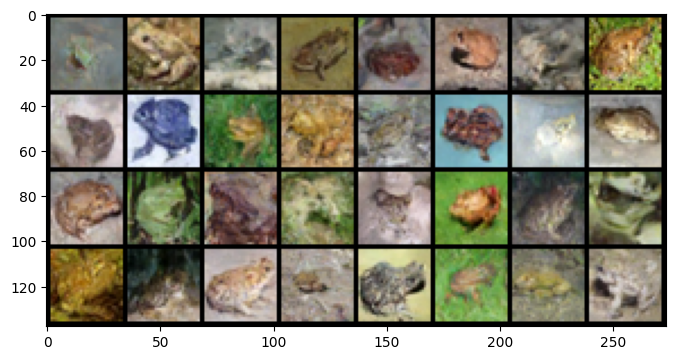

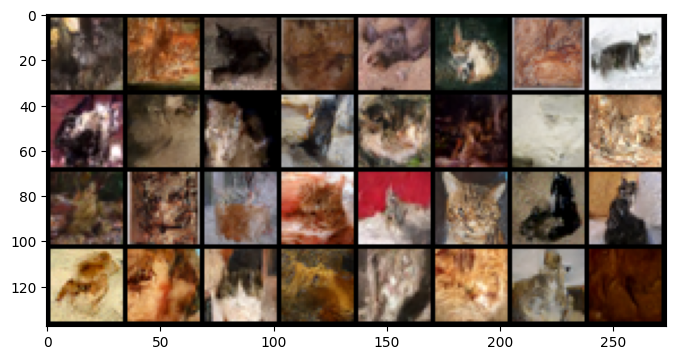

<h2> Desirable Goals </h2>

- We will compare different neural network architectures such as U-Net and simpler architectures (e.g. a CNN).

We experimented with six distinct U-Net structures of varying sizes. The U-Net architecture involves a series of contracting layers, a bottleneck, and a series of expanding layers. The contracting layers consist of a stack of a convolutional layer, a self-attention layer, and a down-sampling which simultaneously shrinks the spatial dimensions of an input and incorporates the time-steps in the diffusion process. The contracting layers shrink the image size, and increases the number of channels similarly to a standard convolutional neural network, but with pooling operations replaced by downsampling. The expanding layers are similar stacks of three distinct layer types, but shrinks the number of channels to the usual three while expanding the image size, outputting an image at the end. The bottleneck consists of a series of convolutional layers.

- We will experiment with hyperparameters such as noise schedule, number of timesteps, and width/size of NN layers to improve performance.

We performed experiments probing the effects of all of these hyperparameters.

The largest model we experimented with consisted of three contracting layers, three expanding layers, and a bottleneck with three layers. The total number of trainable parameters in this model was 23,332,729. The smallest model we worked with shrunk the number of contracting/expanding/bottleneck layers to two as well as decreasing the number of channels at each layer. This model had 3,062,531 trainable parameters, nearly eight times smaller than our largest model. The smallest models trained much faster (approximately 1000 epochs in 2 hours with a GPU) whereas the largest was much slower (approximately 1000 epochs in 7 hours with a GPU). 

Using the largest model, we compared the effect of timesteps by training a model with 500, 1000, and 1500 timesteps respectively, all for 500 epochs. Larger numbers of timesteps resulted in predictably slower train times, but surprisingly didn't appear to generate perceptibly higher quality images (see below for samples).

- Our diffusion model will do conditional generation, following the paper example and reference implementation.

We successfully implemented class conditioning in our model. This involves incorporating a class embedding inside the U-Net structure, akin to the timestep embedding. Interestingly, training a conditional model on two classes (cats and frogs) seemed to produce more accurate images of cats than an unconditional model trained solely on cats.

- We will compare our GAN against our diffusion model using FID score. The architecture of the GAN will follow the above pytorch tutorial, but we will add in class conditioning.

<h2><center> Samples from a Conditional Model </center> </h2>

The following samples were generated by the same conditional model.

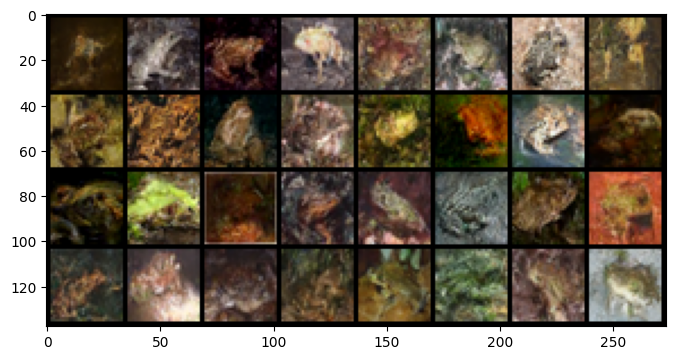
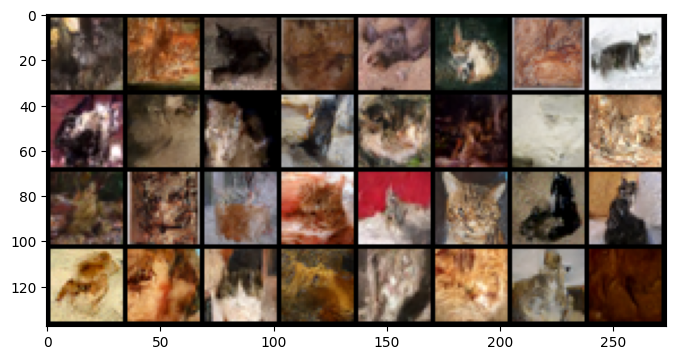

<h2><center> Frog Samples from Timestep Experiments </center></h2>

$T = 500$

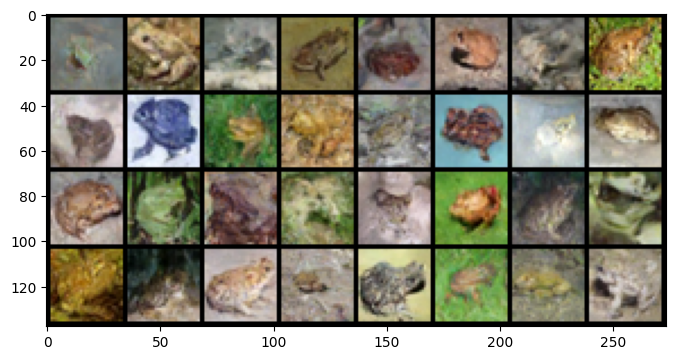

$T = 1000$

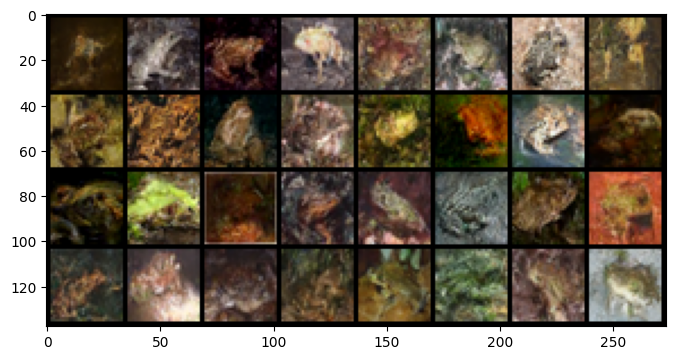

$T = 1500$

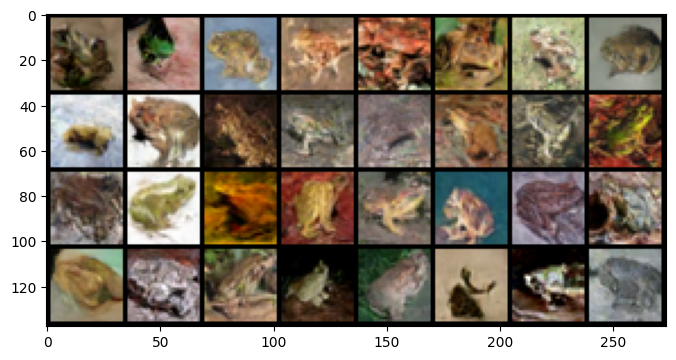


<h1><center> Code Documentation </center></h1>